In [119]:
%matplotlib notebook

In [120]:
# scaling function
def scale(x):
    return (x - x.mean()) / (x.max() - x.min())

# hypothesis function
def h(x1, x2):
    global w
    
    return w[0] + w[1] * x1 + w[2]*x2

In [121]:
data = pd.read_csv("Data set/CarPrice_Assignment.csv")

data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [122]:
df = pd.DataFrame(data)
df = df[["horsepower", "peakrpm", "price"]]

df.tail()

,horsepower,peakrpm,price
200,114,5400,16845.0
201,160,5300,19045.0
202,134,5500,21485.0
203,106,4800,22470.0
204,114,5400,22625.0


<IPython.core.display.Javascript object>


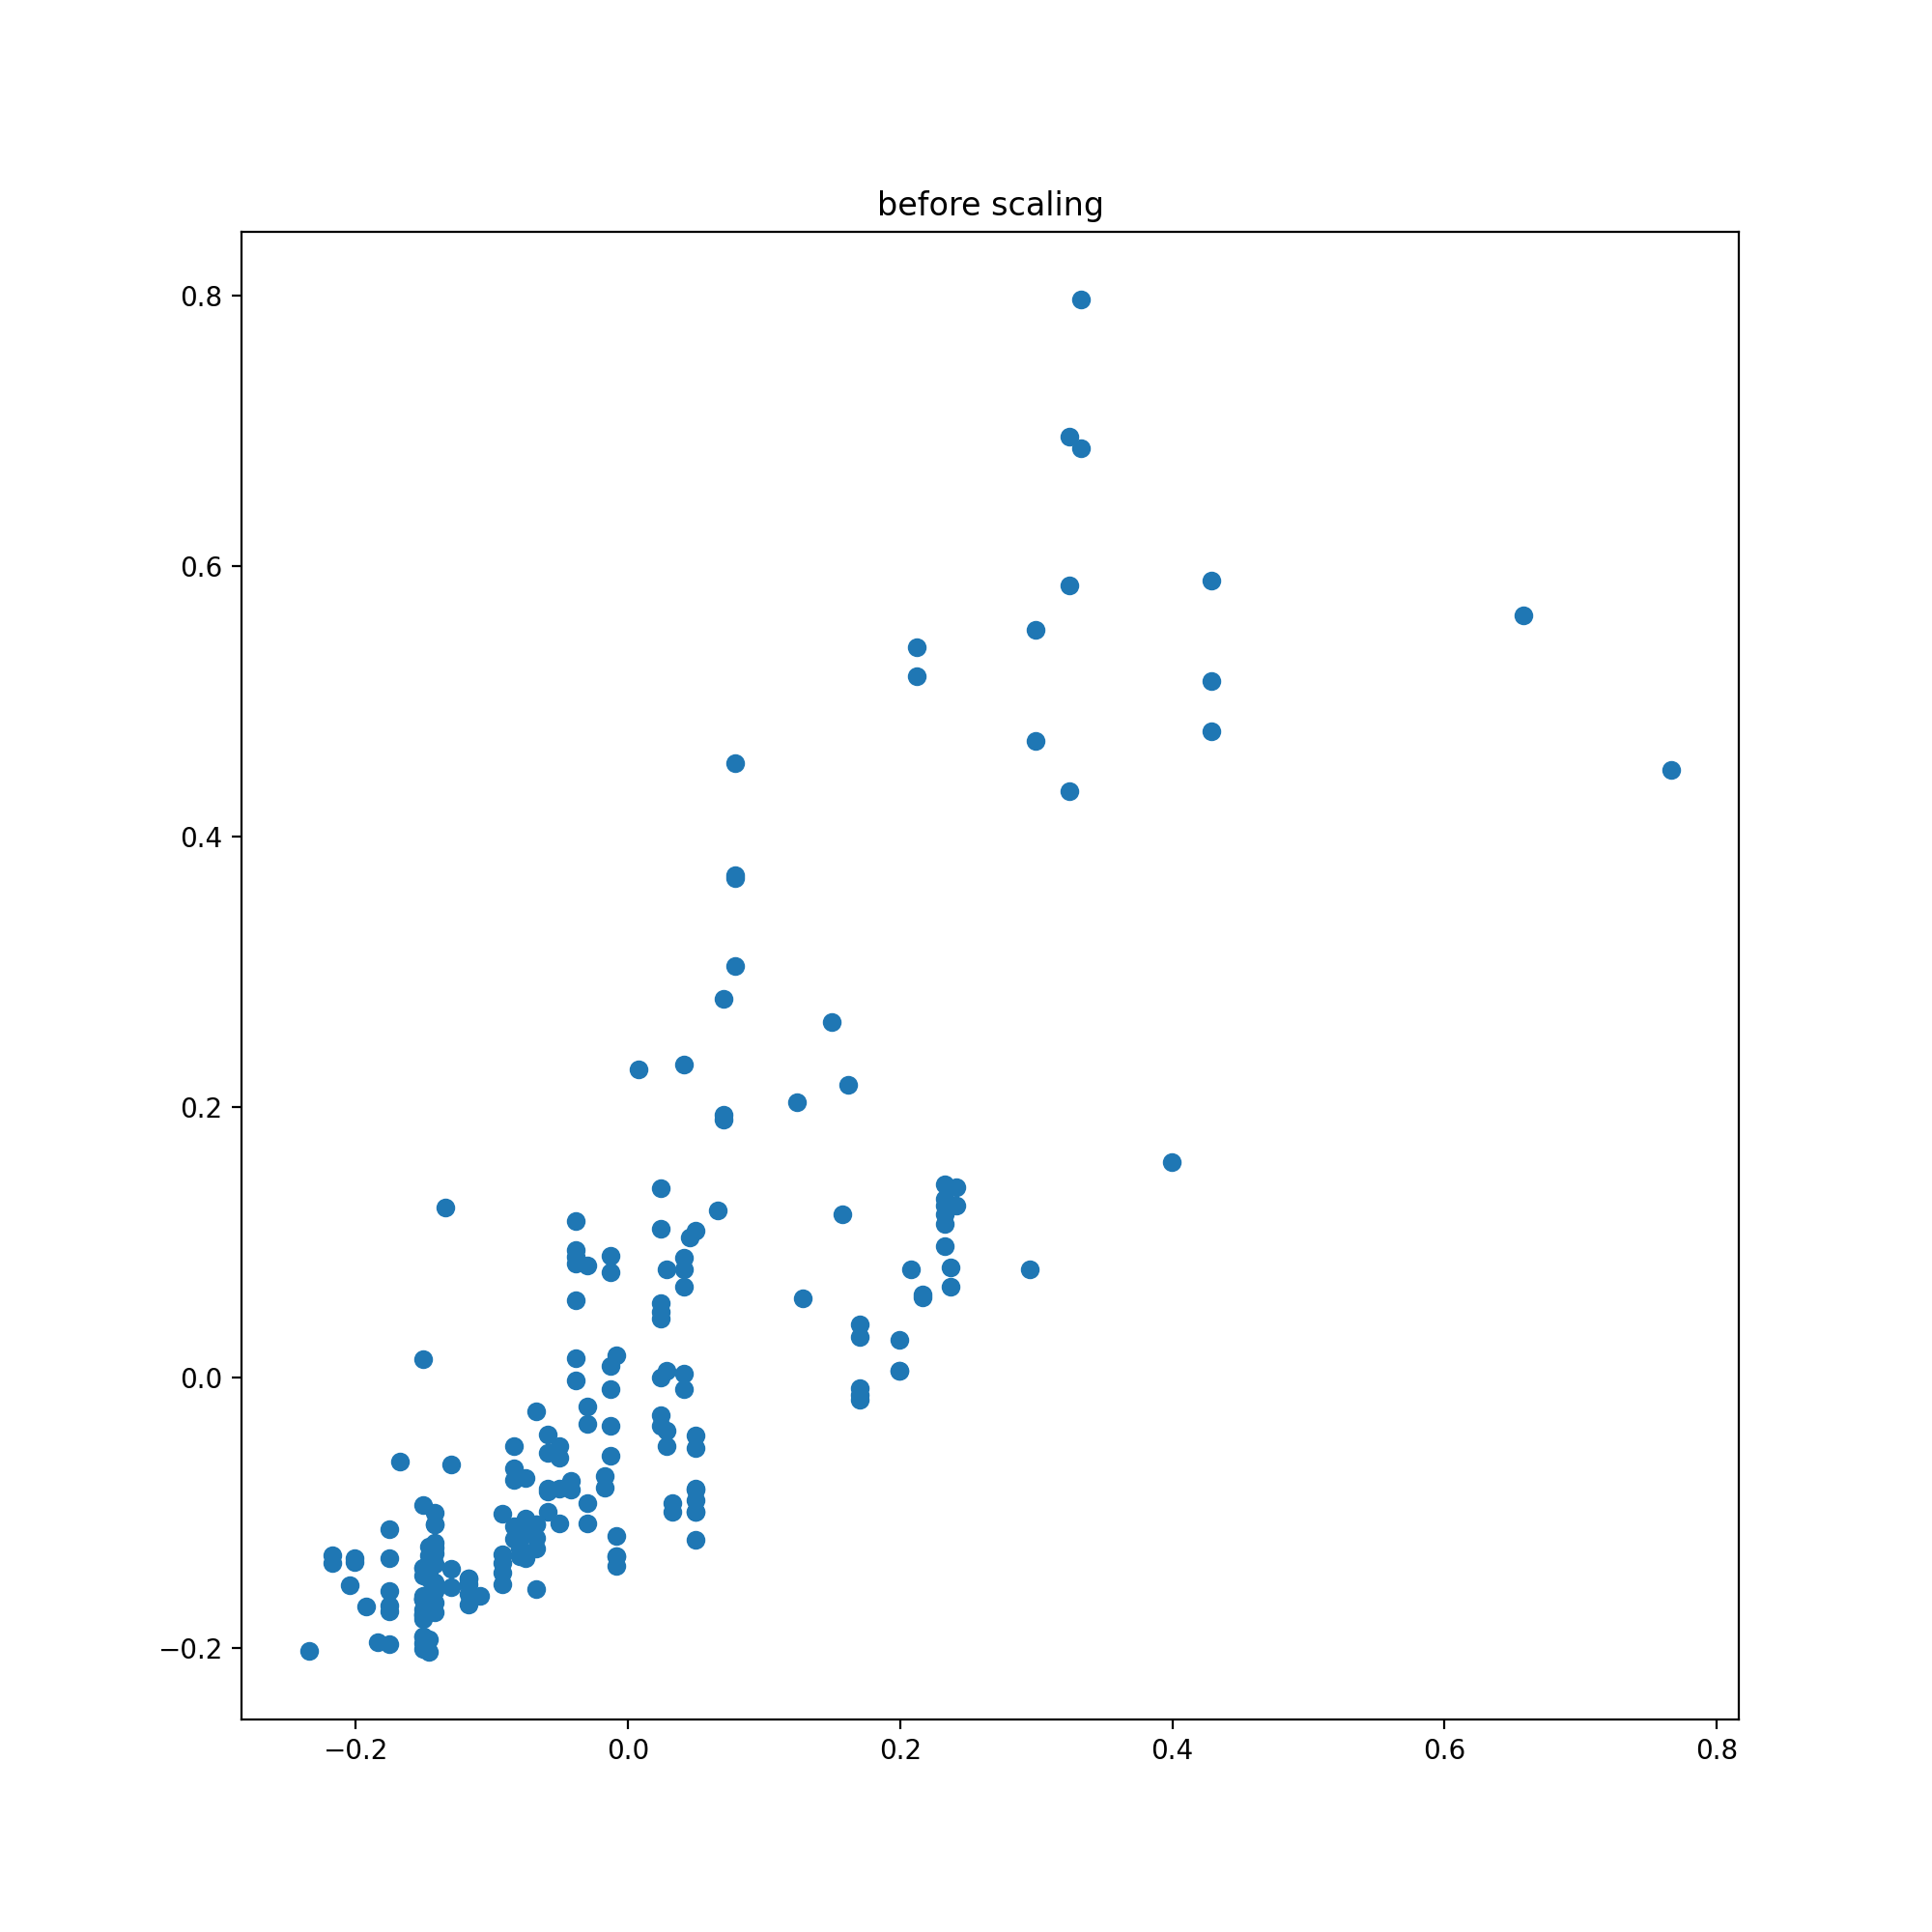

In [141]:
plt.figure(figsize = (10,10))
plt.title("before scaling")
plt.scatter(df.horsepower, df.price)

<IPython.core.display.Javascript object>


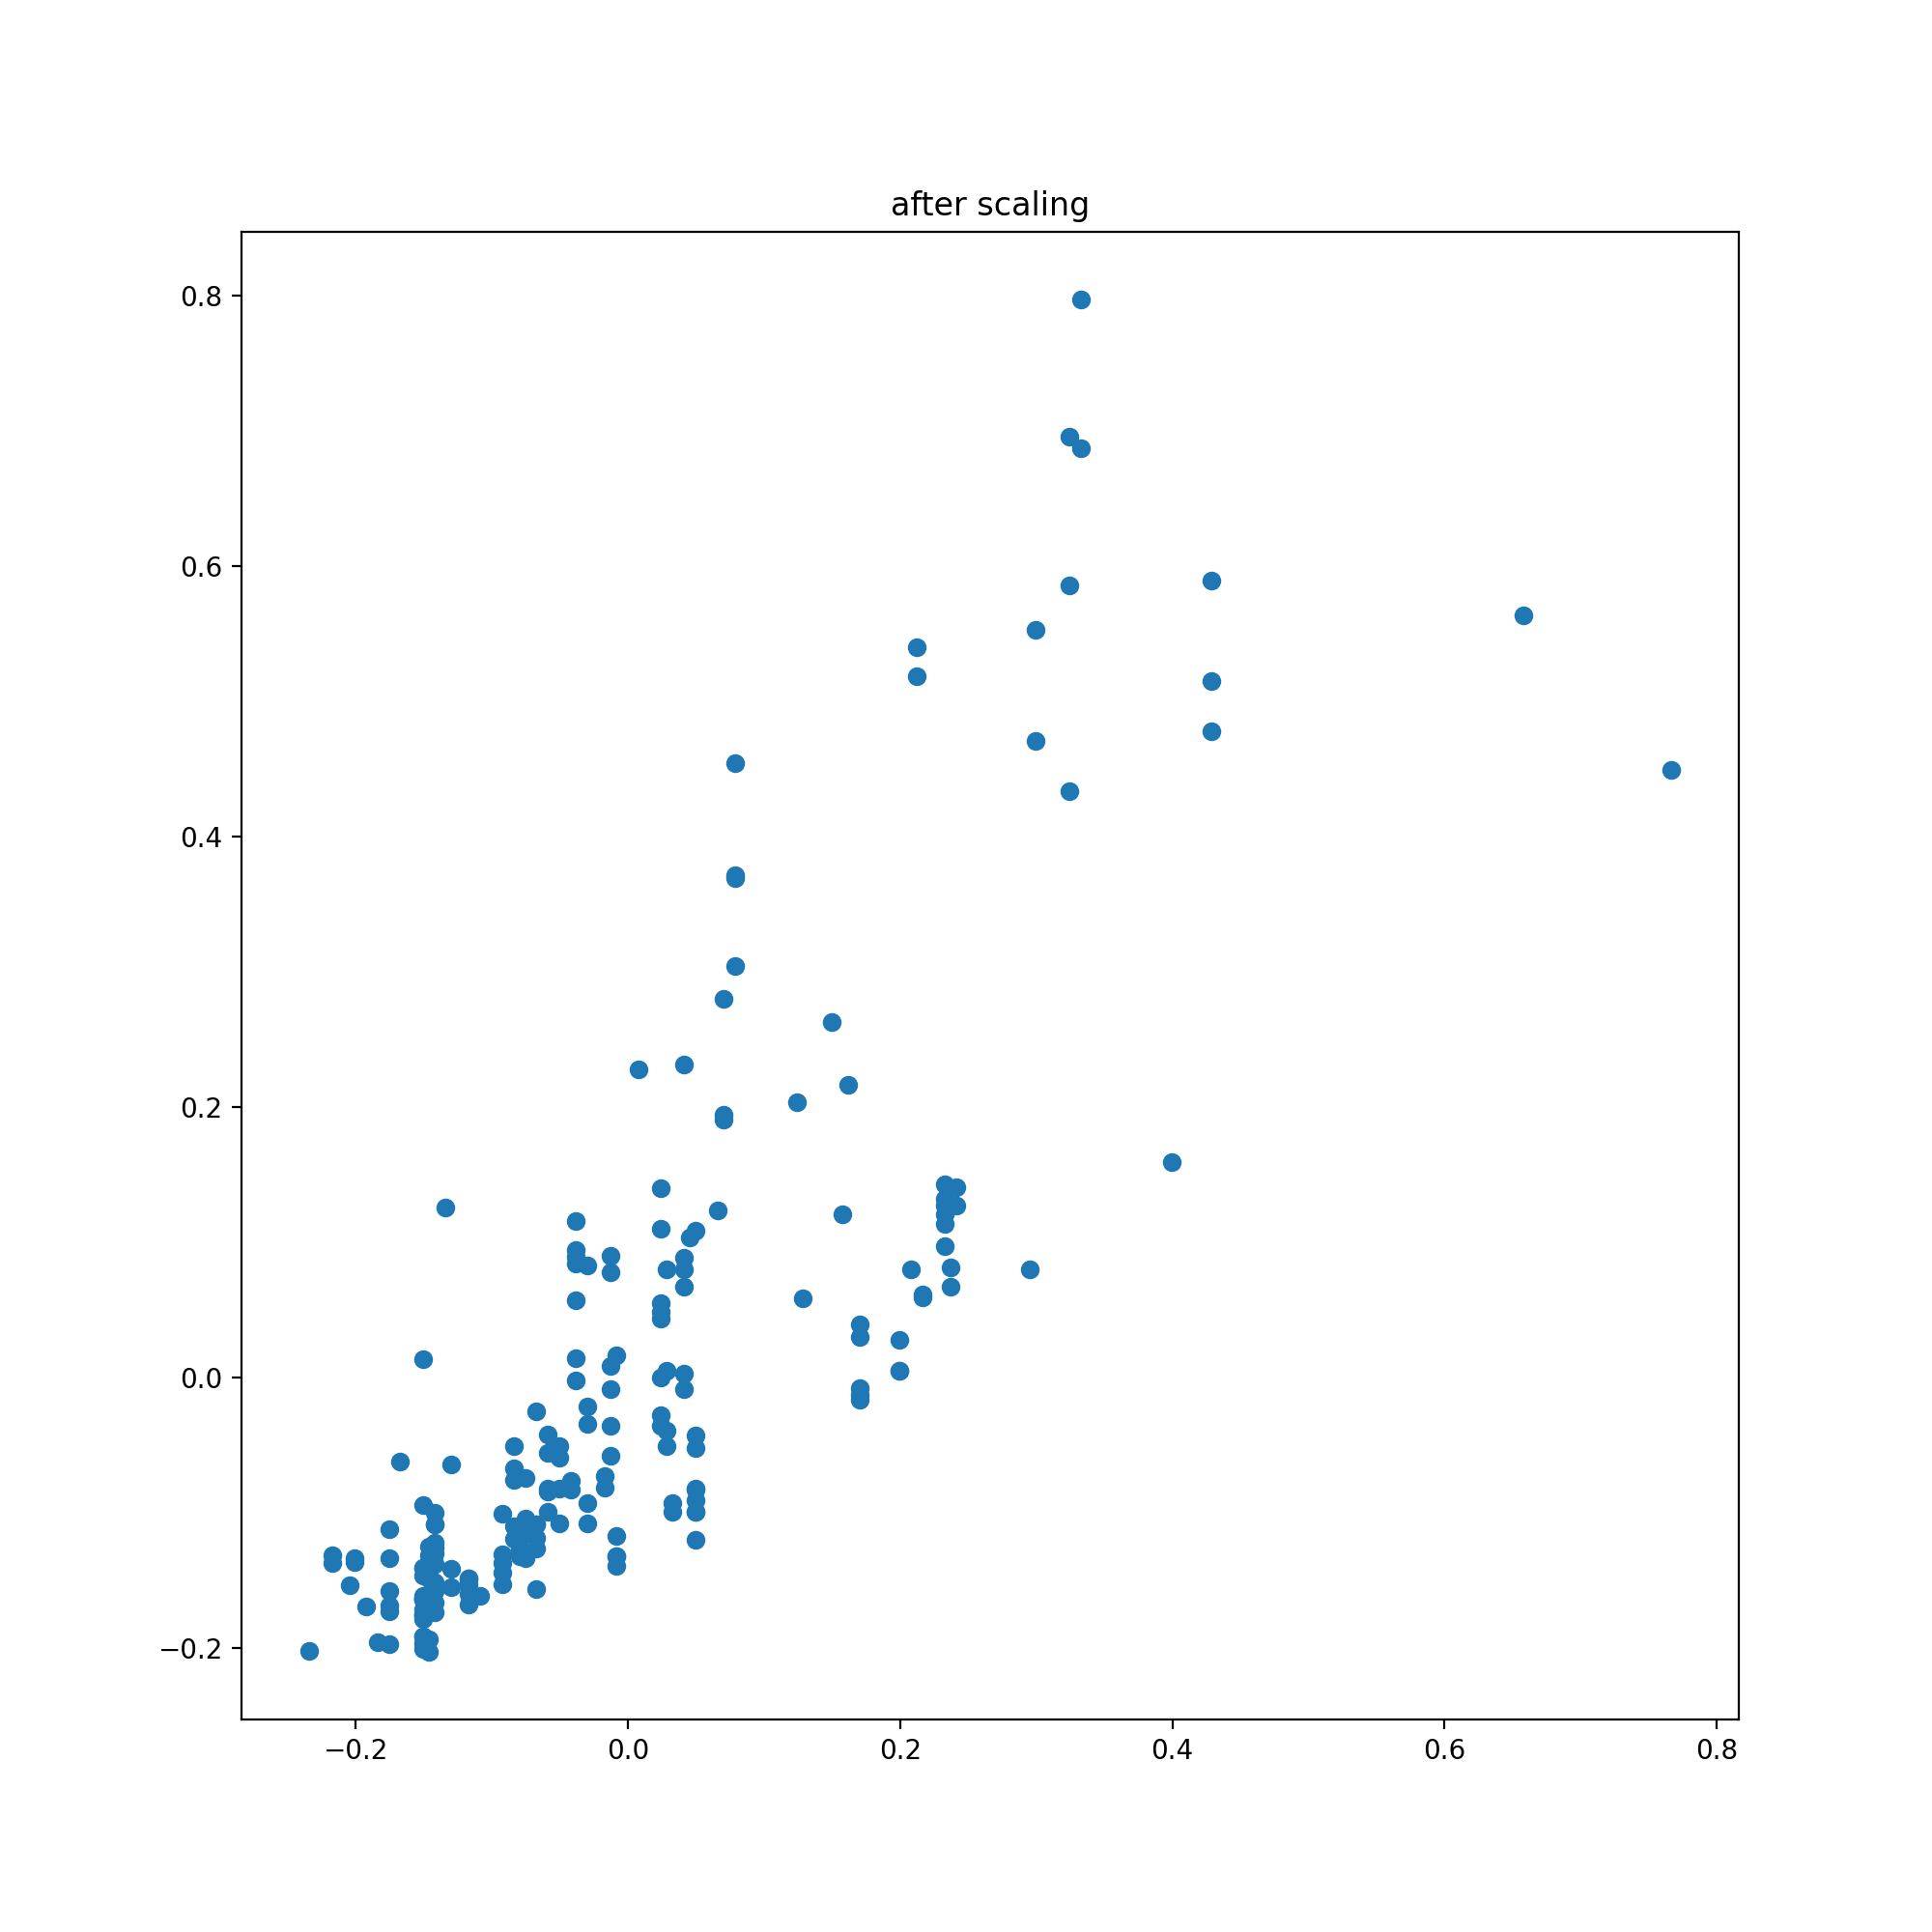

In [142]:
# scaling
for col in df.columns:
    df[col] = scale(df[col])
    
plt.figure(figsize = (10,10))
plt.title('after scaling')
plt.scatter(df.horsepower, df.price)

In [143]:
m = len(df)
w = pd.Series([np.random.rand(),np.random.rand(), np.random.rand()])

echo = int(1e4)   # number of repitition
learning_rate = 0.01   

print(w)

0    0.322314
1    0.005675
2    0.116059
dtype: float64


In [144]:
# gradient
for iter in  range(echo):
    # w0 + w1*x1 + w2*x2
    w_dot = w.dot([[1]*m, df.horsepower, df.peakrpm])
    # h(x) - y
    w2_dot = w_dot - df.price
    
    # mse
    w0_delta = sum(w2_dot)/m
    w1_delta = w2_dot.dot(df.horsepower)/m
    w2_delta = w2_dot.dot(df.peakrpm)/m
    
    # update information
    w[0] = w[0] - ((learning_rate) * (w0_delta))
    w[1] = w[1] - ((learning_rate) * (w1_delta))
    w[2] = w[2] - ((learning_rate) * (w2_delta))

In [158]:
w_dot

array([ 0.03632327,  0.03632327,  0.20759816, -0.03512074,  0.01666005,
       -0.00325564, -0.00325564, -0.00325564,  0.11623848,  0.19590122,
       -0.06046133, -0.06046133,  0.12954829,  0.12954829,  0.12954829,
        0.29064939,  0.29064939,  0.29064939, -0.22173353, -0.15546197,
       -0.15546197, -0.1705474 , -0.1705474 , -0.03512074, -0.1705474 ,
       -0.1705474 , -0.1705474 , -0.03512074, -0.05528889,  0.17174993,
       -0.1605447 , -0.17427807, -0.2024125 , -0.17427807, -0.17427807,
       -0.17427807, -0.17427807, -0.12020839, -0.12020839, -0.12020839,
       -0.12020839, -0.06046133, -0.04308701, -0.08088196, -0.15546197,
       -0.15546197, -0.04732262,  0.31302507,  0.31302507,  0.63777698,
       -0.13495163, -0.13495163, -0.13495163, -0.13495163, -0.13495163,
       -0.07469964, -0.07469964, -0.07469964,  0.06072703, -0.05698313,
       -0.05698313, -0.05698313, -0.05698313, -0.12596715, -0.05698313,
        0.0721715 , -0.06206586,  0.13039541,  0.13039541,  0.13

In [159]:
w2_dot

0      0.030904
1     -0.043695
2      0.127580
3     -0.051835
4     -0.086942
         ...   
200   -0.068787
201    0.066942
202   -0.111431
203   -0.197577
204   -0.212275
Name: price, Length: 205, dtype: float64

In [145]:
divs = 10

x1_range = np.linspace(min(df.horsepower), max(df.horsepower), divs)
x2_range = np.linspace(min(df.peakrpm), max(df.peakrpm), divs)

print(x1_range)
print(x2_range)

[-0.23382114 -0.12271003 -0.01159892  0.0995122   0.21062331  0.32173442
  0.43284553  0.54395664  0.65506775  0.76617886]
[-0.39800896 -0.28689785 -0.17578674 -0.06467563  0.04643548  0.1575466
  0.26865771  0.37976882  0.49087993  0.60199104]


<IPython.core.display.Javascript object>


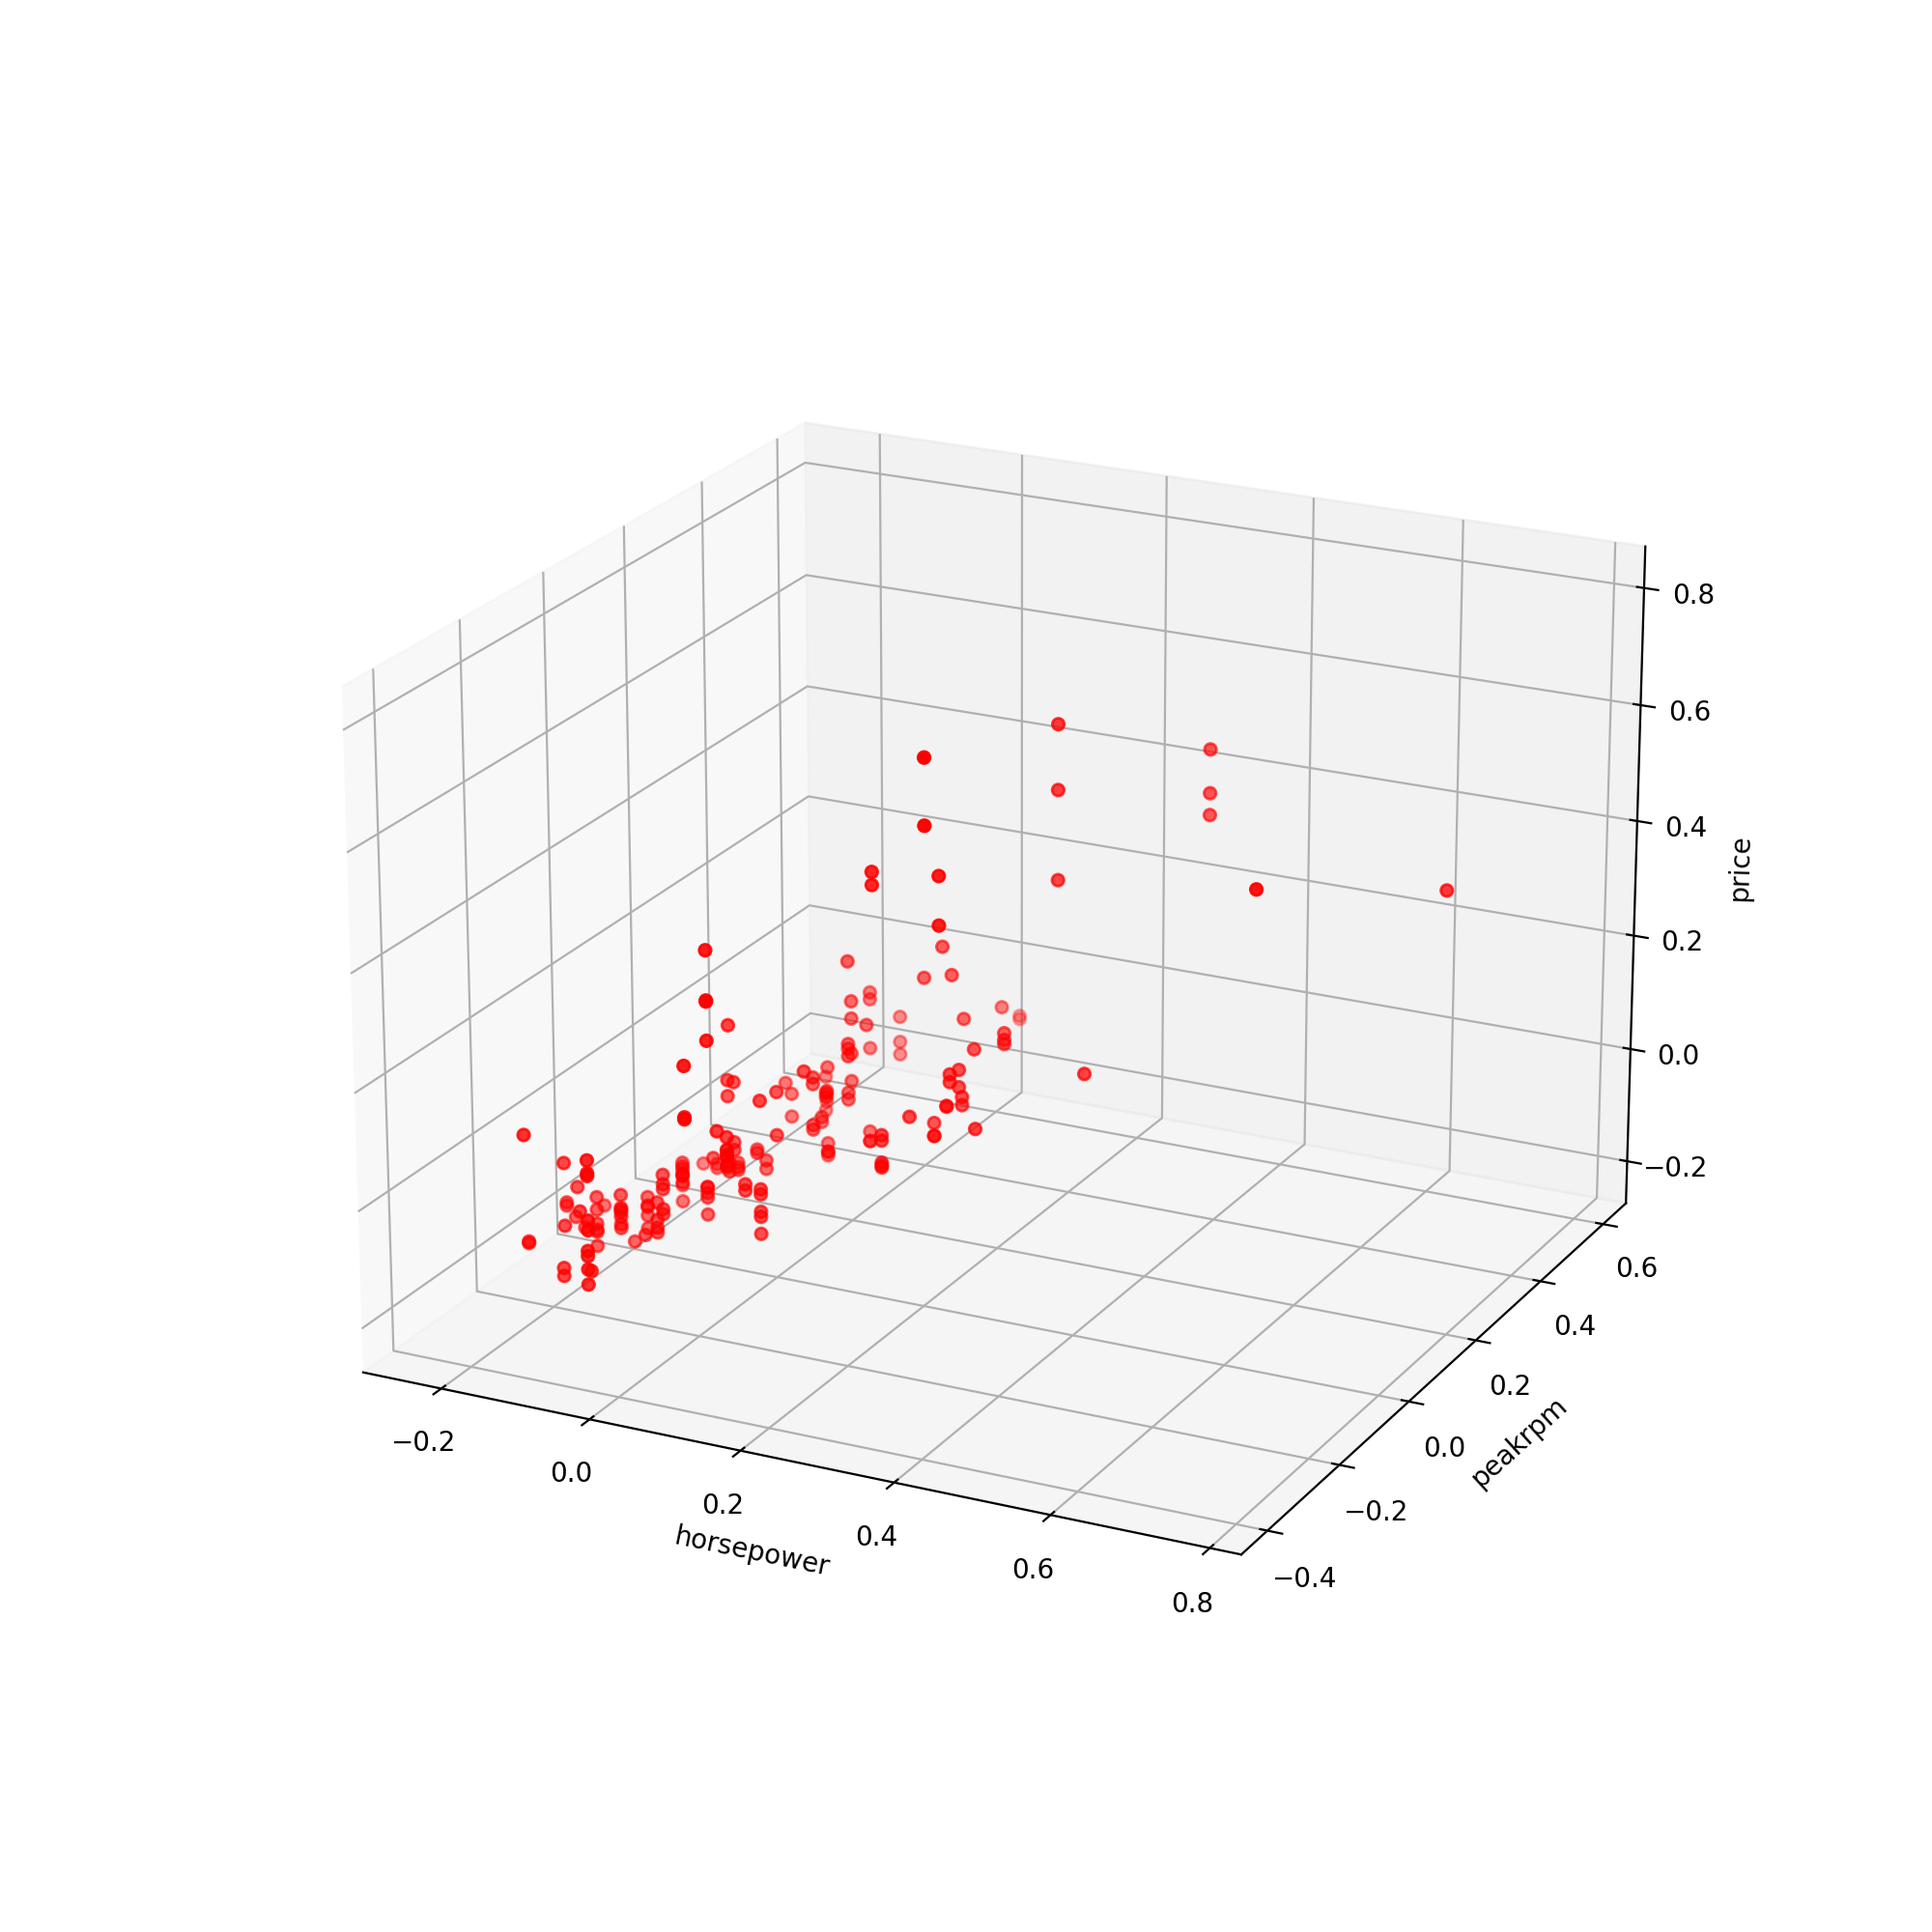

In [127]:
fig = plt.figure(figsize = (10,10))
ax3d = plt.axes(projection = '3d')

X, Y = np.meshgrid(x1_range, x2_range)
Z = h(X, Y)

ax3d.set_xlabel('horsepower')
ax3d.set_ylabel('peakrpm')
ax3d.set_zlabel('price')
ax3d.scatter(df.horsepower, df.peakrpm, df.price, color = 'r')

In [146]:
print(w)

0    1.390639e-17
1    9.266323e-01
2   -1.723011e-01
dtype: float64


<IPython.core.display.Javascript object>


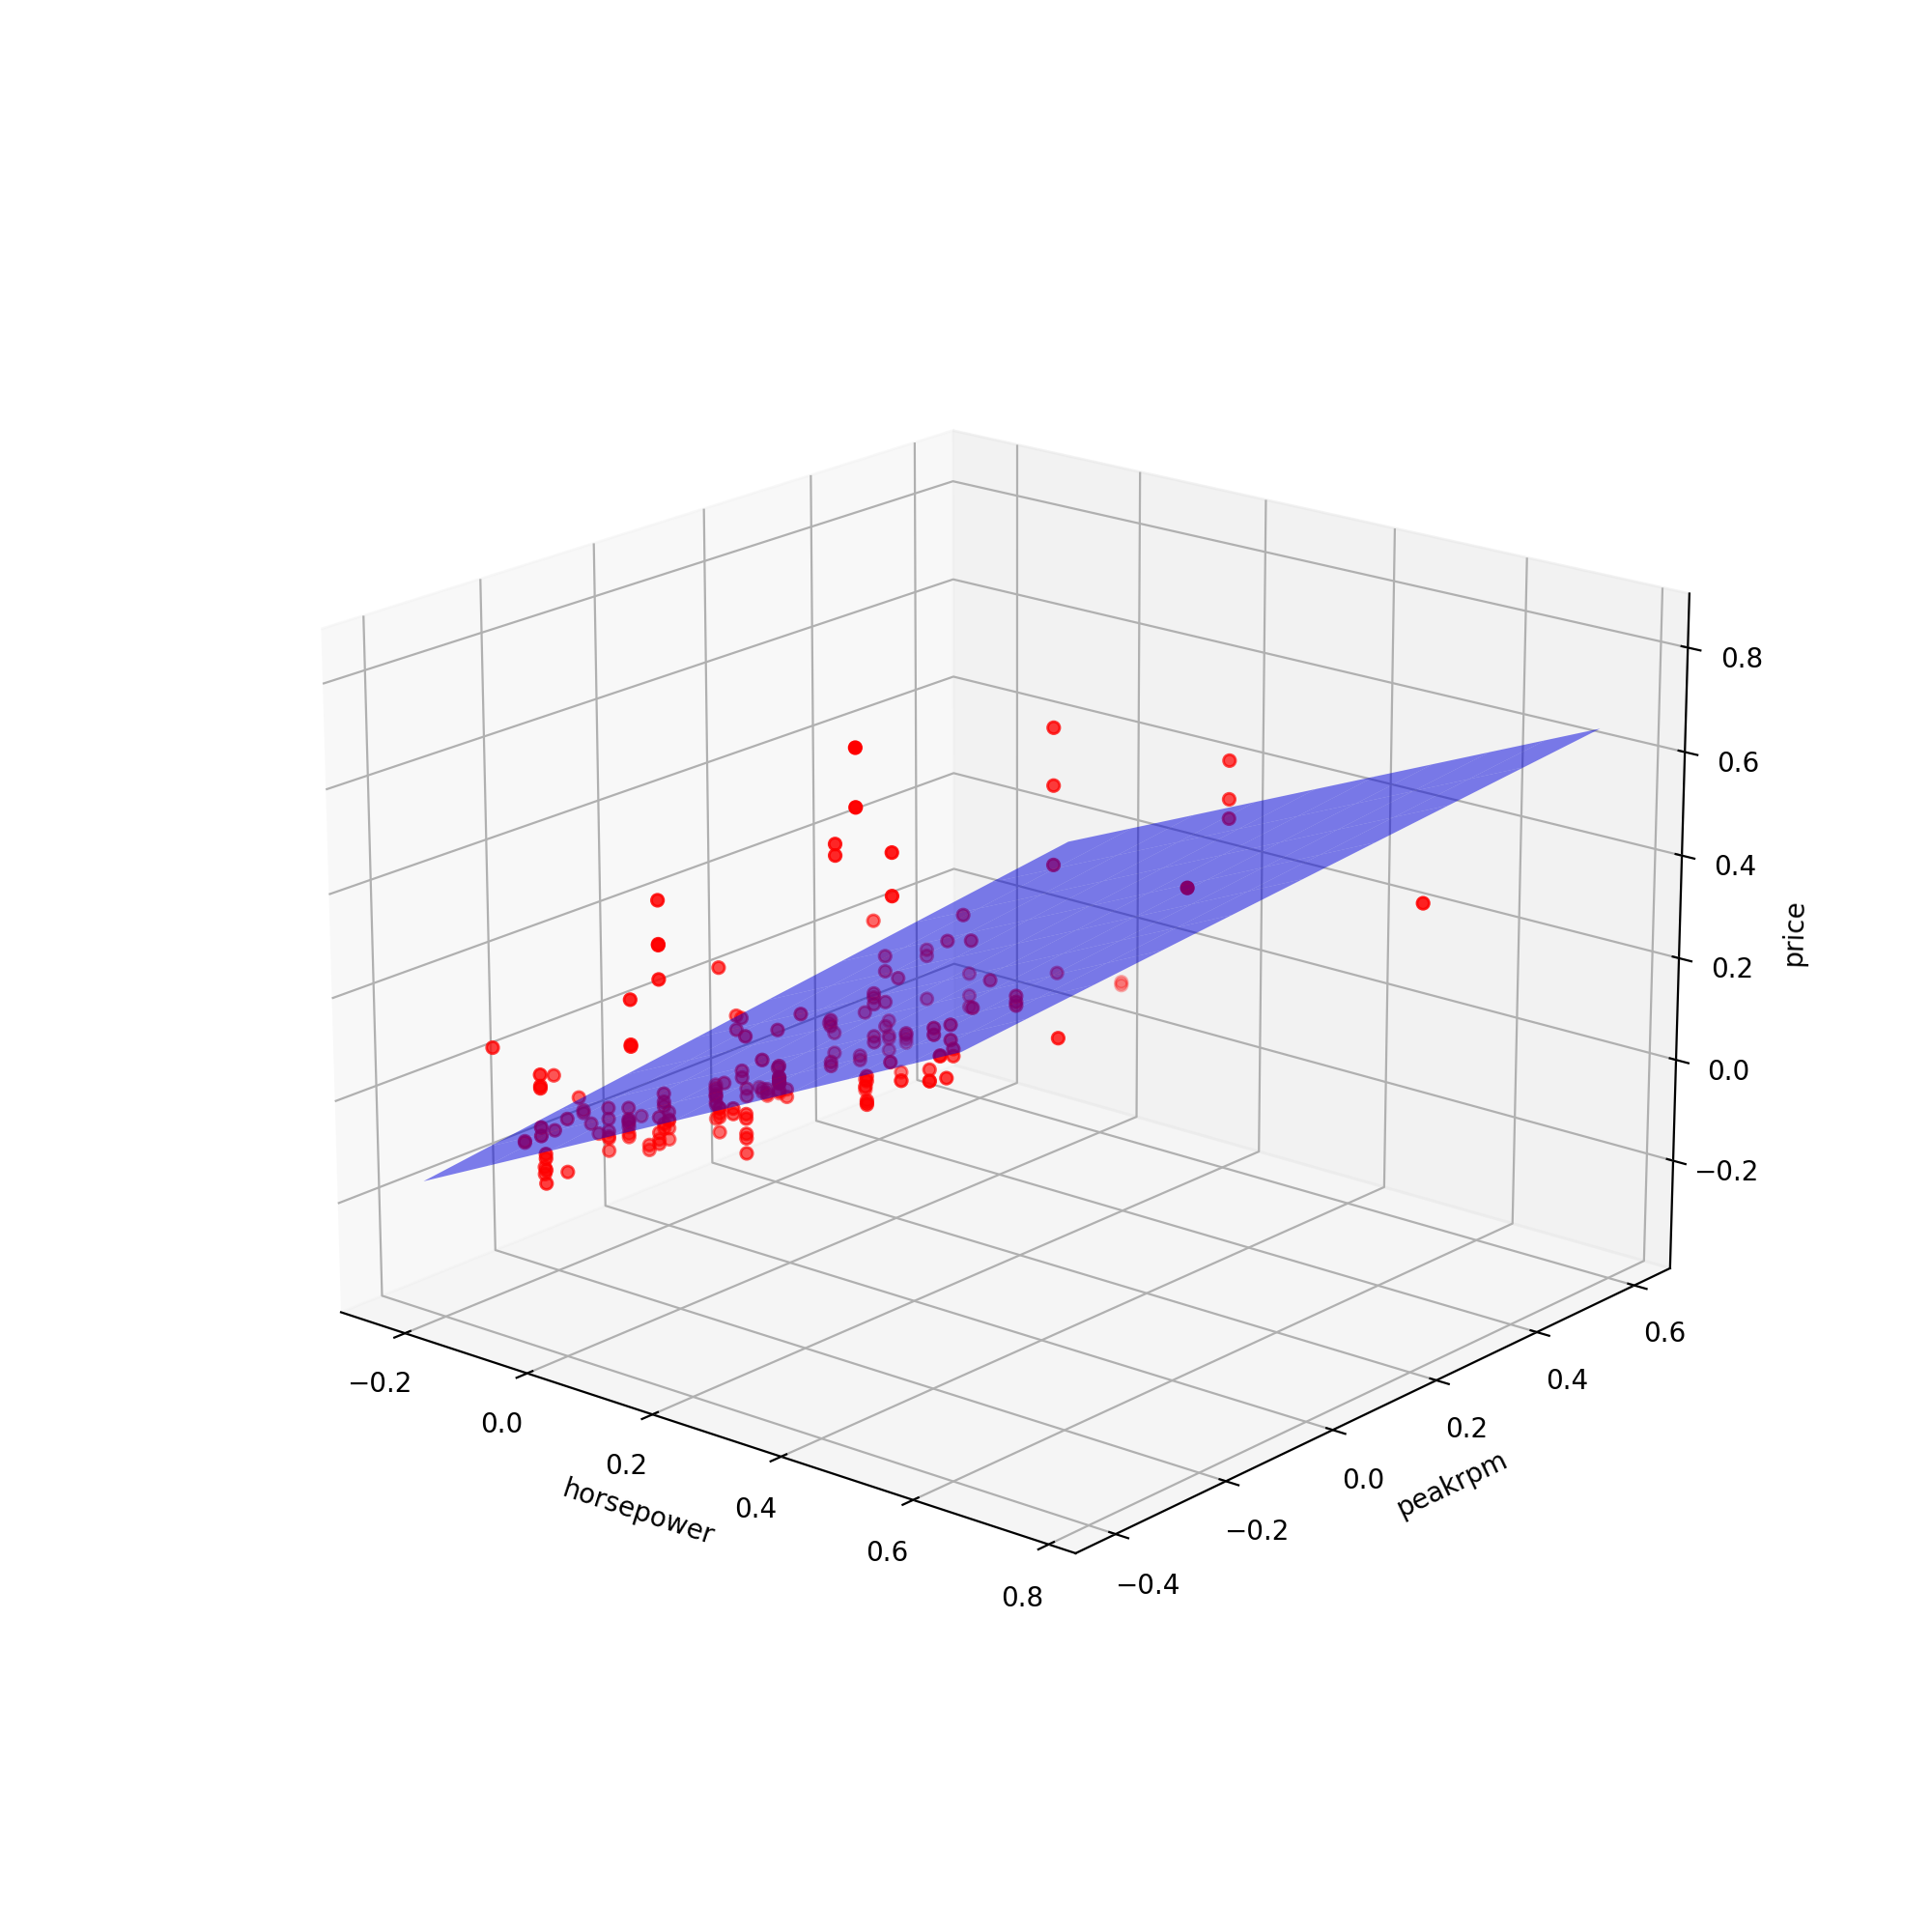

In [136]:
fig = plt.figure(figsize = (10,10))
ax3d = plt.axes(projection = '3d')

ax3d.set_xlabel('horsepower')
ax3d.set_ylabel('peakrpm')
ax3d.set_zlabel('price')

ax3d.scatter3D(df.horsepower, df.peakrpm, df.price, color = 'r')
ax3d.plot_surface(X, Y, Z, color = 'b', alpha = 0.5)
surf = ax3d.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis', alpha = 0)

plt.show()

<IPython.core.display.Javascript object>


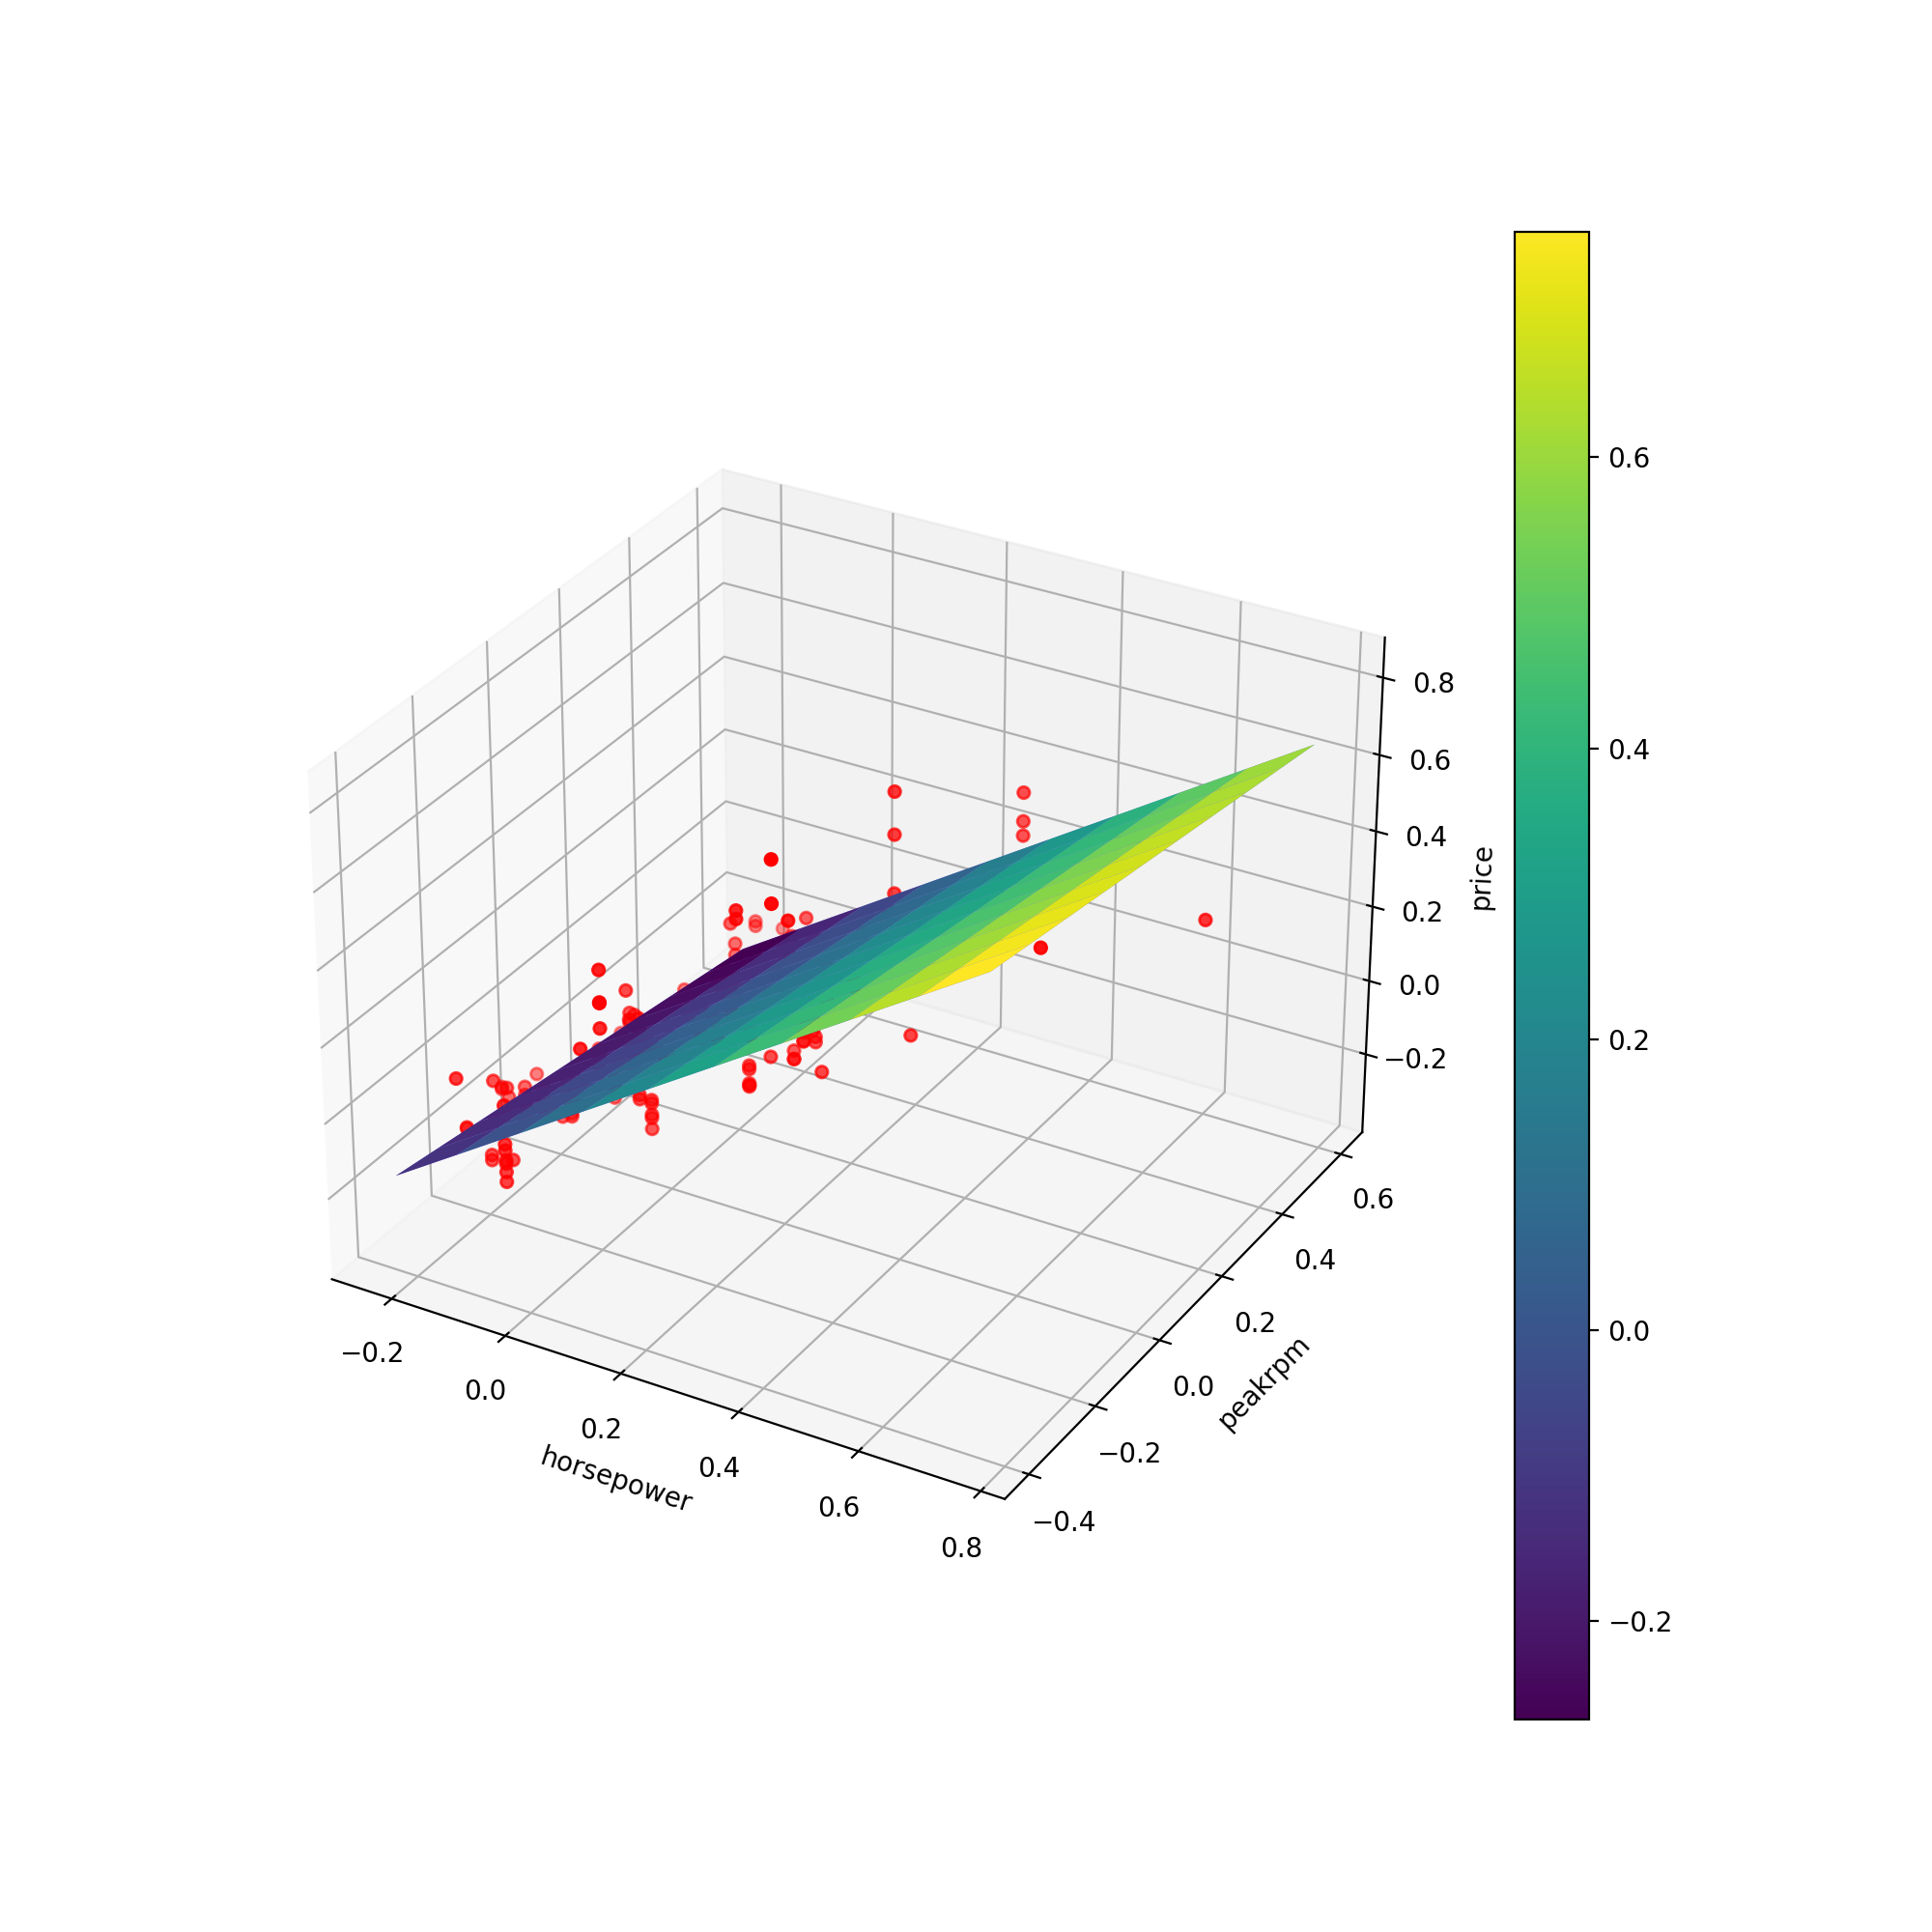

In [134]:
fig = plt.figure(figsize = (10,10))
ax3d = plt.axes(projection = '3d')

ax3d.set_xlabel('horsepower')
ax3d.set_ylabel('peakrpm')
ax3d.set_zlabel('price')

ax3d.scatter3D(df.horsepower, df.peakrpm, df.price, color = 'r')
ax3d.plot_surface(X, Y, Z, color = 'b', alpha = 0.5)
surf = ax3d.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis')

fig.colorbar(surf, ax = ax3d)

plt.show()

<IPython.core.display.Javascript object>


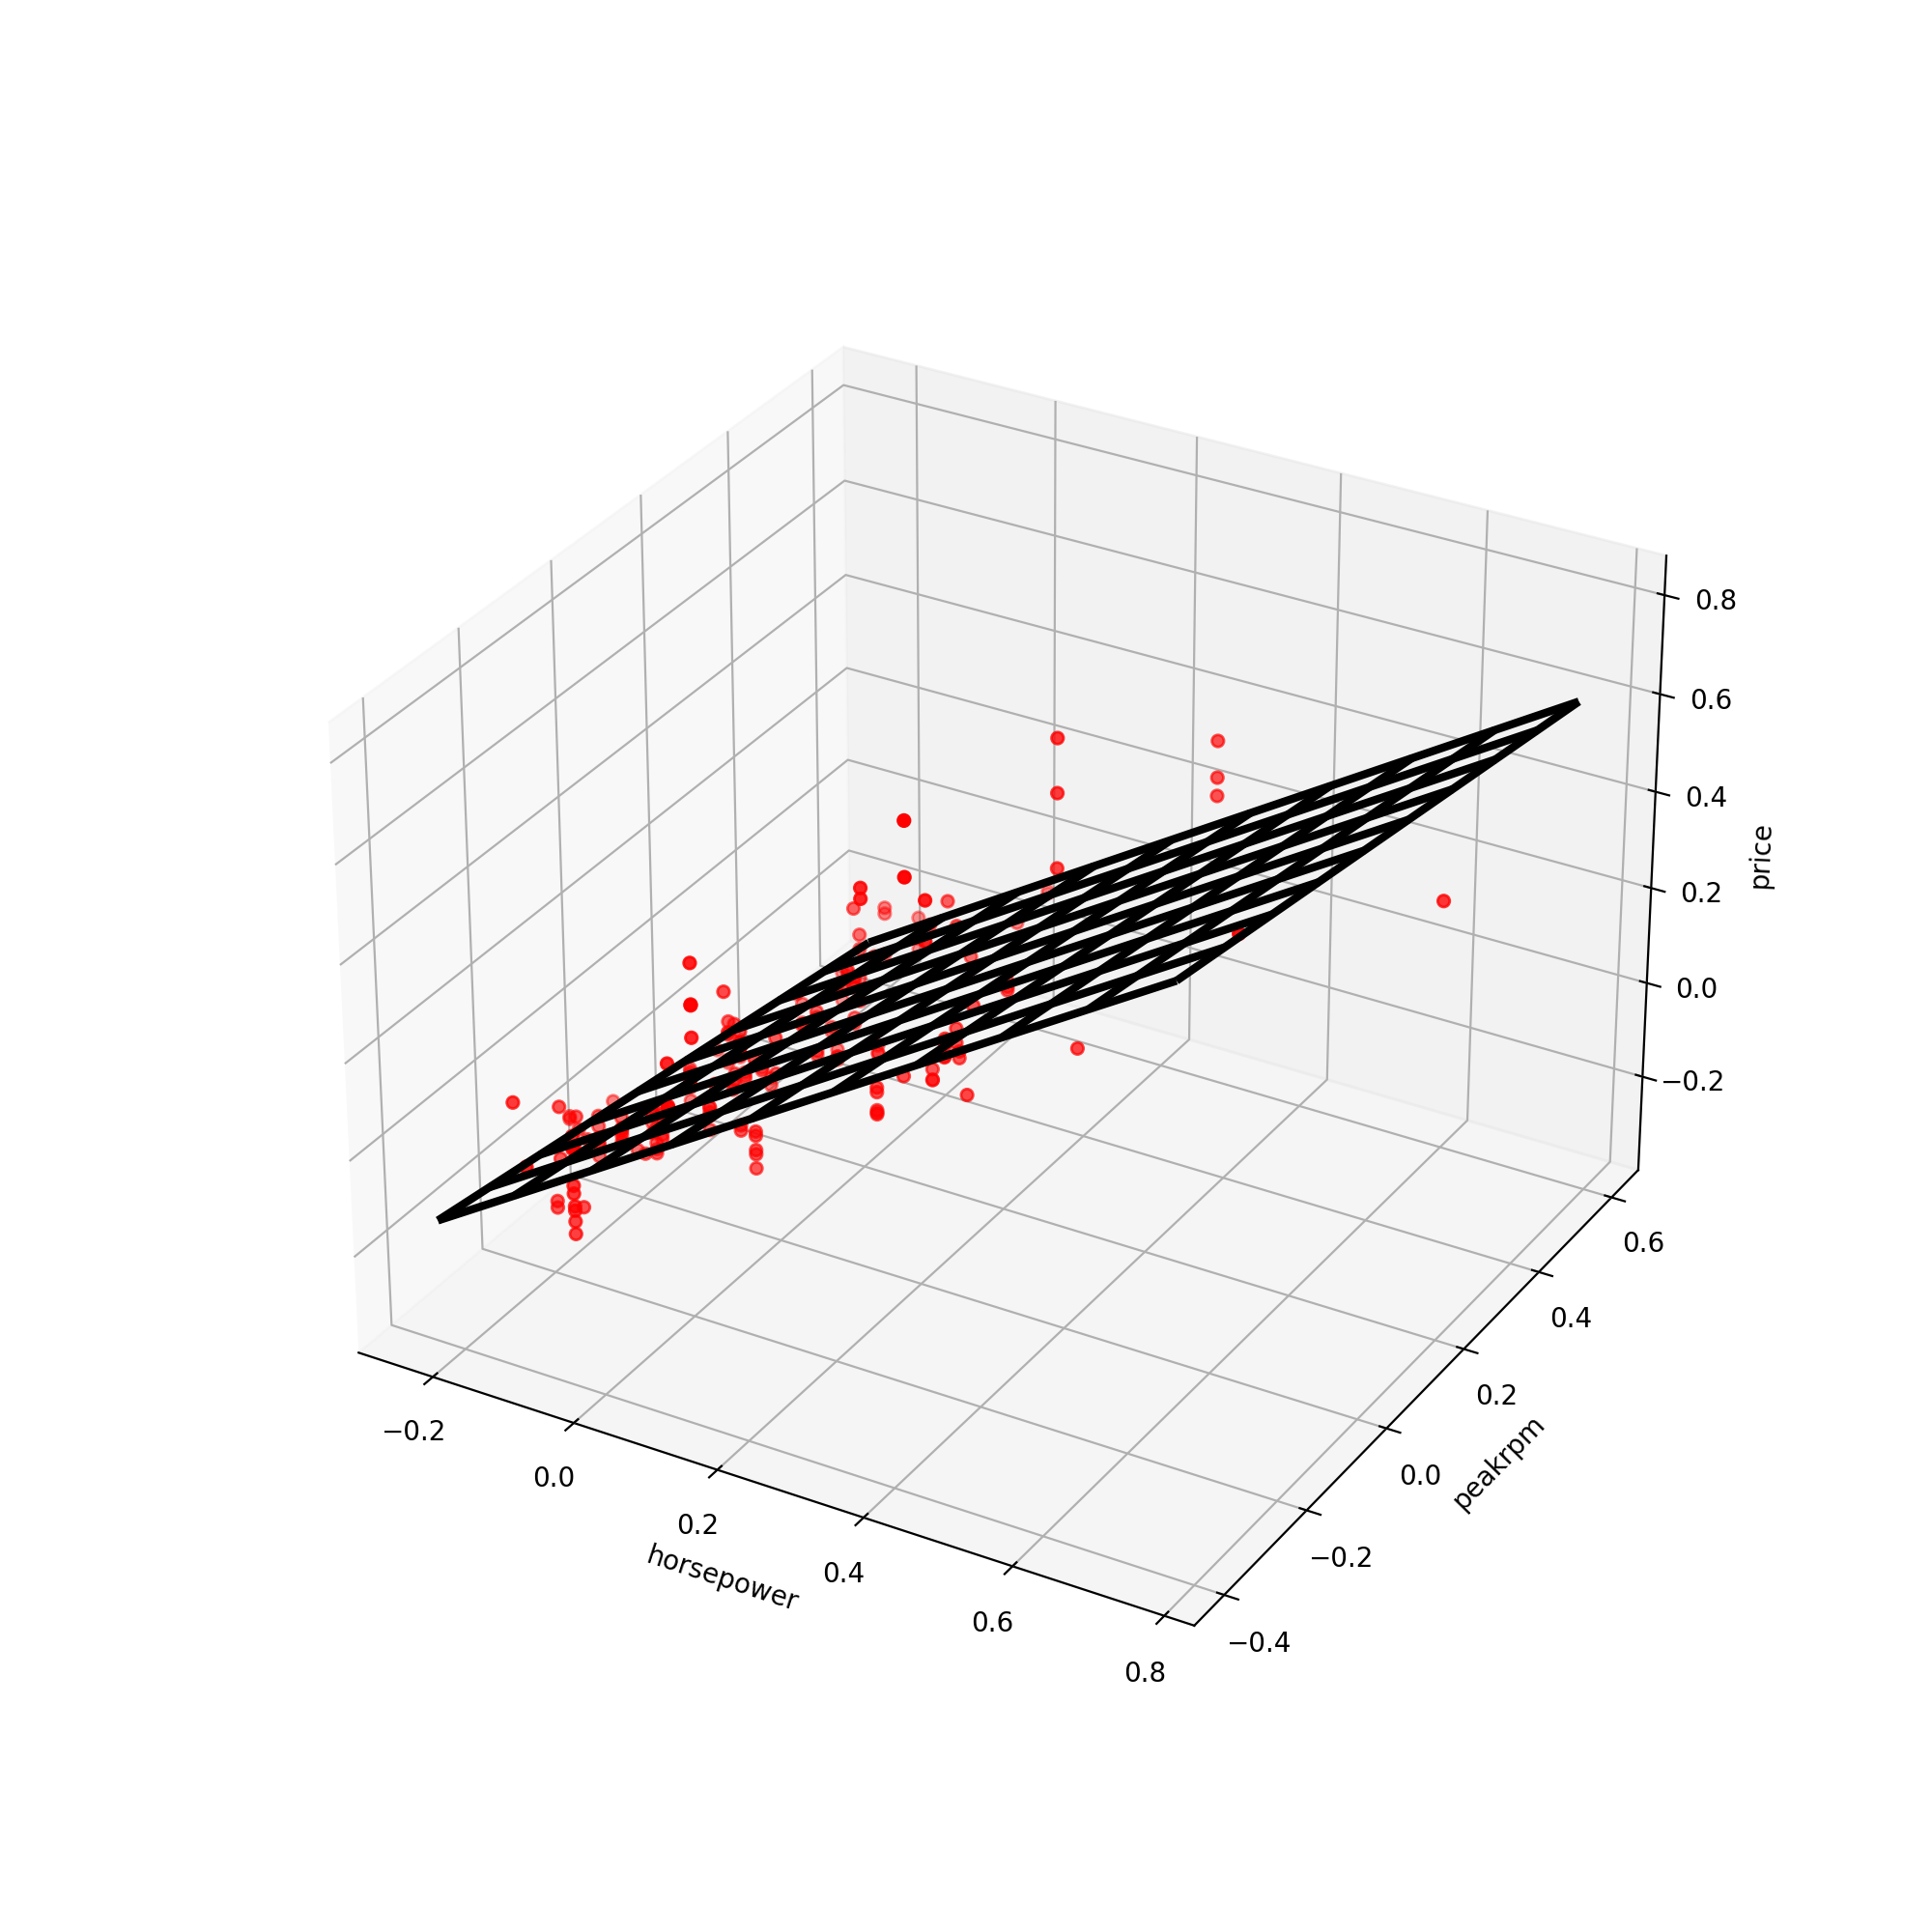

In [147]:
fig = plt.figure(figsize=(10, 10))
ax3d = plt.axes(projection = '3d')

divs = 10

x1_range = np.linspace(min(df.horsepower), max(df.horsepower), divs)
x2_range = np.linspace(min(df.peakrpm), max(df.peakrpm), divs)


X, Y = np.meshgrid(x1_range, x2_range)
Z = h(X, Y)

ax3d.set_xlabel('horsepower')
ax3d.set_ylabel('peakrpm')
ax3d.set_zlabel('price')

ax3d.scatter3D(df.horsepower, df.peakrpm, df.price, color = 'r')
ax3d.plot_wireframe(X, Y, Z, color = 'black', lw=3)

plt.show()

---
### Full code
---

<IPython.core.display.Javascript object>


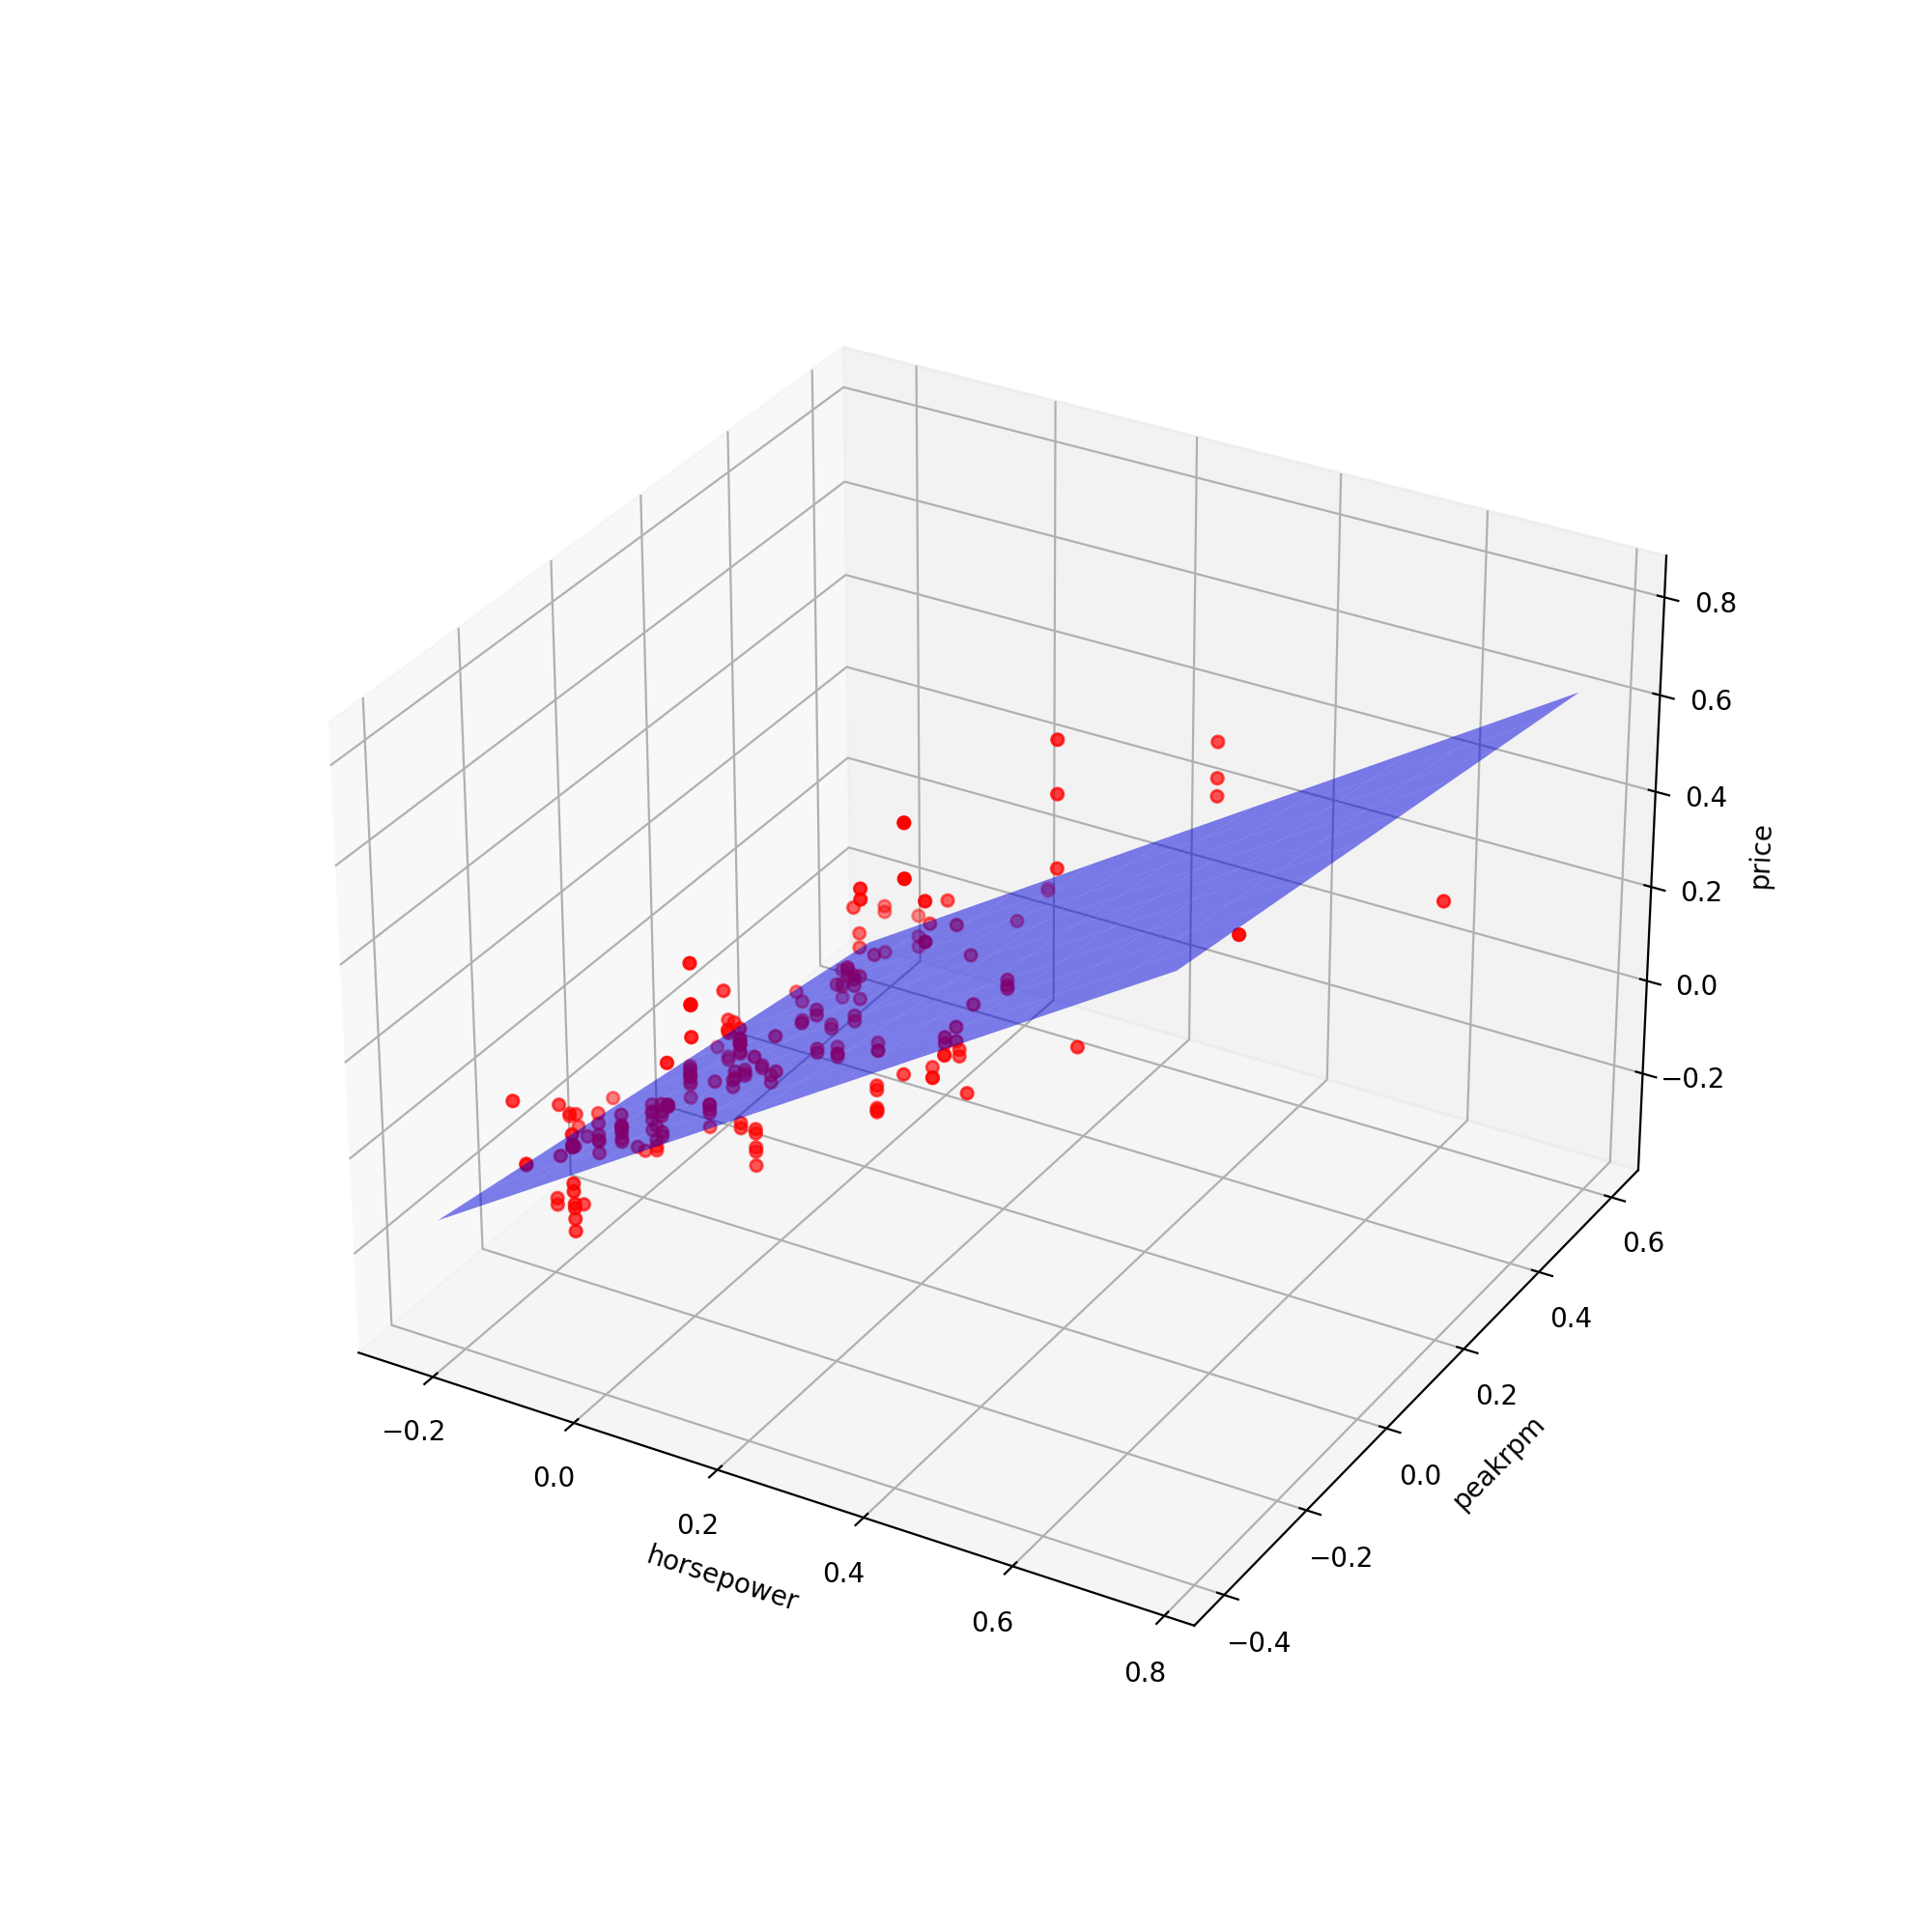

In [149]:
def scale(x):
    return (x - x.mean()) / (x.max() - x.min())


def h(x1, x2):
    global w
    
    return w[0] + w[1] * x1 + w[2]*x2


if __name__ =='__main__':
    df = pd.DataFrame(data)
    df = df[["horsepower", "peakrpm", "price"]]
    
    for col in df.columns:
        df[col] = scale(df[col])
        
    m = len(df)
    w = pd.Series([np.random.rand(),np.random.rand(), np.random.rand()])

    echo = int(1e4)   
    learning_rate = 0.01   
    
    for iter in  range(echo):
        w_dot = w.dot([[1]*m, df.horsepower, df.peakrpm])
        w2_dot = w_dot - df.price

        w0_delta = sum(w2_dot)/m
        w1_delta = w2_dot.dot(df.horsepower)/m
        w2_delta = w2_dot.dot(df.peakrpm)/m

        w[0] = w[0] - ((learning_rate) * (w0_delta))
        w[1] = w[1] - ((learning_rate) * (w1_delta))
        w[2] = w[2] - ((learning_rate) * (w2_delta))
        
        
    divs = 10
    x1_range = np.linspace(min(df.horsepower), max(df.horsepower), divs)
    x2_range = np.linspace(min(df.peakrpm), max(df.peakrpm), divs)
    
    X, Y = np.meshgrid(x1_range, x2_range)
    Z = h(X, Y)
    
    fig = plt.figure(figsize = (10,10))
    ax3d = plt.axes(projection = '3d')
    
    ax3d.set_xlabel('horsepower')
    ax3d.set_ylabel('peakrpm')
    ax3d.set_zlabel('price')
    
    ax3d.scatter(df.horsepower, df.peakrpm, df.price, color = 'r')
    ax3d.plot_surface(X, Y, Z, color = 'b', alpha = 0.5)
    surf = ax3d.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis', alpha = 0)

    plt.show()